# Case study on Pre-processing
Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

# 1. Load the dataset into python environment

In [226]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [227]:
df=pd.read_csv('titanic_dataset.csv')

In [228]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Insight
## Dataset is loaded in python.

# 2. Make ‘PassengerId’ as the index column

In [229]:
df.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S


# Insight
## Assigned passenger id as index column.

# 3. Check the basic details of the dataset

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [231]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [232]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [233]:
df.shape

(891, 12)

# Insight
## Checked the dataset for basic details.

# 4. Fill in all the missing values present in all the columns in the dataset
   
    

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


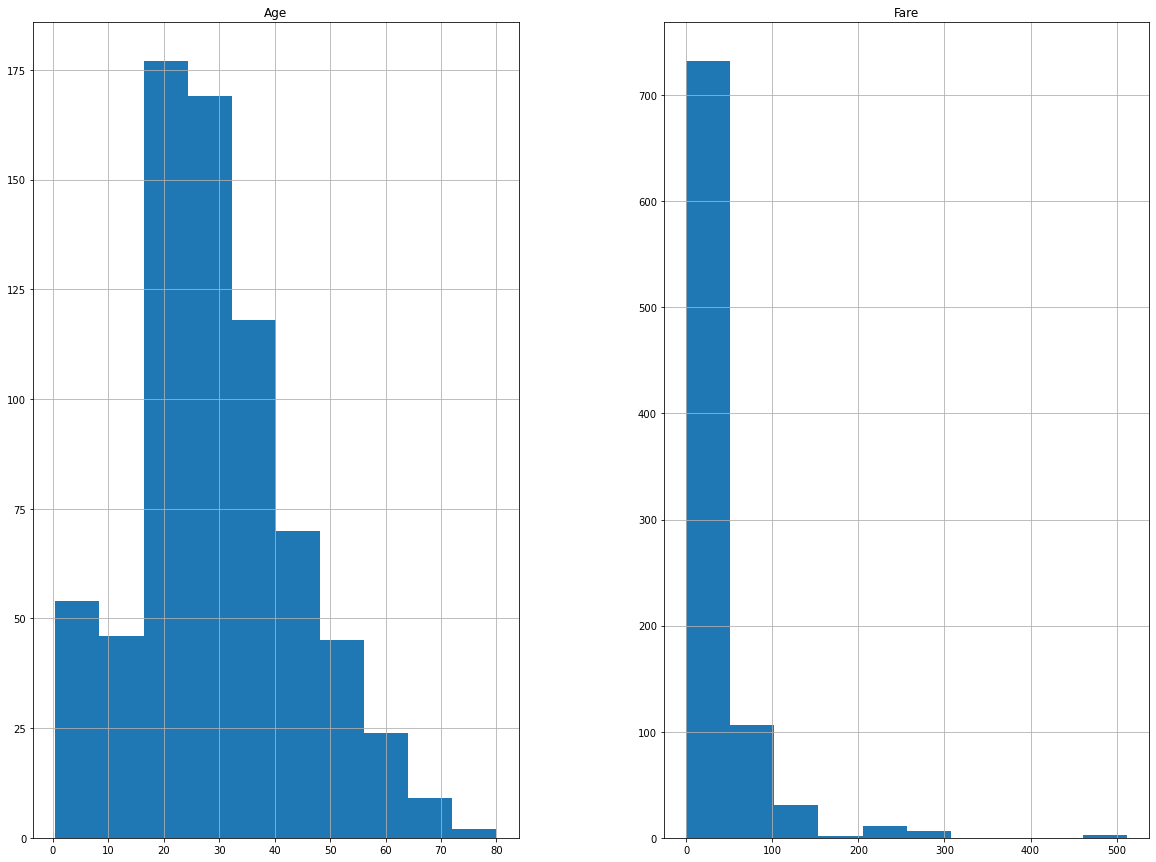

In [235]:
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [236]:
df['Age'].median()

28.0

In [237]:
df['Age'].mean()

29.69911764705882

In [238]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [240]:
df['Cabin'].fillna('not specified',inplace=True)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [242]:
df["Embarked"].fillna(df["Embarked"].mode().iat[0],inplace=True)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Insight
## All null values are removed

# 5. Check and handle outliers in at least 3 columns in the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x241fcb7a5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x241fcb7aca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x241fcb7a250>],
 'medians': [<matplotlib.lines.Line2D at 0x241fcb843a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x241fcb84700>],
 'means': []}

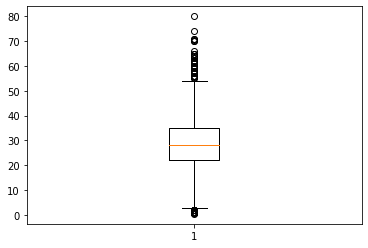

In [246]:
plt.boxplot(df['Age'])

In [247]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

22.0
28.0
35.0
2.5
54.5


In [248]:
outlier=[]
for x in df['Age']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [249]:
ind=df['Age']<low_lim
df.loc[ind].index

Int64Index([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],
           dtype='int64')

In [250]:
ind1=df['Age']>up_lim
df.loc[ind1].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [251]:
df.drop([10, 43, 63, 171, 184, 193, 261, 348, 374, 407, 445, 618, 691, 750,
            850, 869],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x241fcbde400>,
 'caps': [<matplotlib.lines.Line2D at 0x241fcbdeac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x241fcbde0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x241fcbeb1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x241fcbeb520>],
 'means': []}

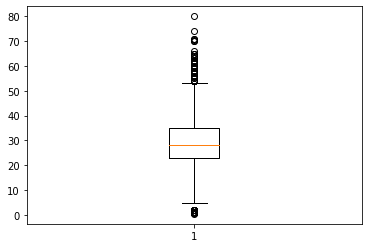

In [252]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x241fcc45430>,
 'caps': [<matplotlib.lines.Line2D at 0x241fcc45af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x241fcc450d0>],
 'medians': [<matplotlib.lines.Line2D at 0x241fcc4e1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x241fcc4e550>],
 'means': []}

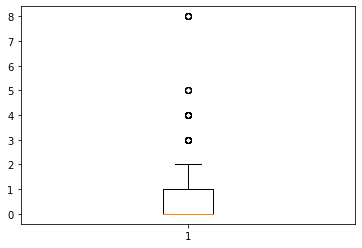

In [253]:
plt.boxplot(df['SibSp'])

In [254]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

0.0
0.0
1.0
-1.5
2.5


In [255]:
outlier=[]
for x in df['SibSp']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 8,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 8]

In [256]:
ind1=df['SibSp']>up_lim
df.loc[ind1].index

Int64Index([  7,  16,  24,  27,  50,  59,  68,  71,  85,  88, 119, 159, 164,
            176, 180, 182, 201, 229, 233, 266, 278, 324, 341, 386, 409, 480,
            485, 541, 542, 634, 642, 683, 686, 726, 787, 792, 813, 819, 824,
            846, 863],
           dtype='int64')

In [257]:
df.drop([  7,  16,  24,  27,  50,  59,  68,  71,  85,  88, 119, 159, 164,
            176, 180, 182, 201, 229, 233, 266, 278, 324, 341, 386, 409, 480,
            485, 541, 542, 634, 642, 683, 686, 726, 787, 792, 813, 819, 824,
            846, 863],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x241fcca0b50>,
 'caps': [<matplotlib.lines.Line2D at 0x241fccae250>,
 'boxes': [<matplotlib.lines.Line2D at 0x241fcca0850>],
 'medians': [<matplotlib.lines.Line2D at 0x241fccae910>],
 'fliers': [<matplotlib.lines.Line2D at 0x241fccaec70>],
 'means': []}

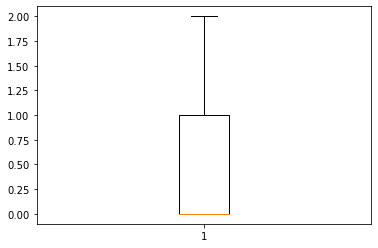

In [258]:
plt.boxplot(df['SibSp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x241fcd08340>,
 'caps': [<matplotlib.lines.Line2D at 0x241fcd08a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x241fccfbfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x241fcd18100>],
 'fliers': [<matplotlib.lines.Line2D at 0x241fcd18460>],
 'means': []}

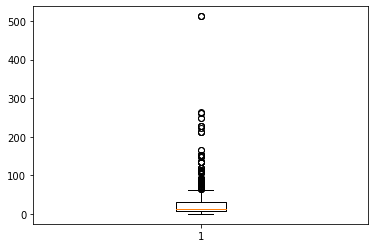

In [259]:
plt.boxplot(df['Fare'])

In [260]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

7.8958
13.0
29.85
-25.0355
62.7813


In [261]:
outlier=[]
for x in df['Fare']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 146.5208,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 80.0,
 83.1583,
 89.1042,
 164.8667,
 83.1583]

In [262]:
ind1=df['Fare']>up_lim
df.loc[ind1].index

Int64Index([  1,  31,  34,  52,  61,  62,  72,  97, 102, 118,
            ...
            765, 779, 789, 802, 820, 829, 835, 849, 856, 879],
           dtype='int64', length=108)

In [263]:
df.drop([1, 31, 34, 52, 61, 62, 72, 97, 102, 118, 120, 124, 139, 151, 195, 215, 218, 224, 230, 245, 256, 257, 258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310, 311, 318, 319, 325, 332, 334, 336, 337, 366, 369, 373, 375, 377, 380, 385, 390, 393, 412, 435, 438, 453, 484, 486, 496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581, 585, 587, 591, 609, 615, 627, 641, 645, 655, 659, 660, 665, 679, 681, 689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 754, 759, 763, 765, 779, 789, 802, 820, 829, 835, 849, 856, 879],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x241fcd64b80>,
 'caps': [<matplotlib.lines.Line2D at 0x241fcd70280>,
 'boxes': [<matplotlib.lines.Line2D at 0x241fcd64820>],
 'medians': [<matplotlib.lines.Line2D at 0x241fcd70940>],
 'fliers': [<matplotlib.lines.Line2D at 0x241fcd70ca0>],
 'means': []}

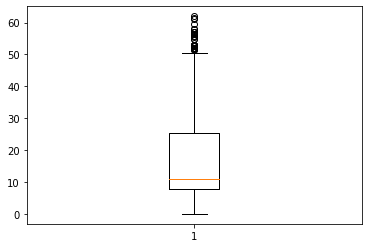

In [264]:
plt.boxplot(df['Fare'])

# Insight
 ## Box plot of age,sibSp and fare are plotted and outliers are identified and removed.

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [265]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [266]:
df.drop('Name',axis=1,inplace=True)

In [267]:
df.drop('Ticket',axis=1,inplace=True)

In [268]:
df.drop('PassengerId',axis=1,inplace=True)

In [269]:
df=pd.get_dummies(df)

In [270]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B30,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B42,Cabin_B50,Cabin_B51 B53 B55,Cabin_B71,Cabin_B94,Cabin_C101,Cabin_C103,Cabin_C104,Cabin_C106,Cabin_C110,Cabin_C111,Cabin_C118,Cabin_C123,Cabin_C124,Cabin_C126,Cabin_C128,Cabin_C148,Cabin_C30,Cabin_C47,Cabin_C49,Cabin_C52,Cabin_C87,Cabin_C90,Cabin_D,Cabin_D17,Cabin_D19,Cabin_D21,Cabin_D28,Cabin_D30,Cabin_D35,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E36,Cabin_E38,Cabin_E44,Cabin_E46,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_not specified,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,0,3,28.0,0,0,8.4583,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [271]:
x=df.drop('Survived',axis=1)

In [272]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B30,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B42,Cabin_B50,Cabin_B51 B53 B55,Cabin_B71,Cabin_B94,Cabin_C101,Cabin_C103,Cabin_C104,Cabin_C106,Cabin_C110,Cabin_C111,Cabin_C118,Cabin_C123,Cabin_C124,Cabin_C126,Cabin_C128,Cabin_C148,Cabin_C30,Cabin_C47,Cabin_C49,Cabin_C52,Cabin_C87,Cabin_C90,Cabin_D,Cabin_D17,Cabin_D19,Cabin_D21,Cabin_D28,Cabin_D30,Cabin_D35,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E36,Cabin_E38,Cabin_E44,Cabin_E46,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_not specified,Embarked_C,Embarked_Q,Embarked_S
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,2.458678,29.970041,0.264463,0.268595,16.900573,0.303030,0.696970,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.002755,0.001377,0.002755,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.002755,0.002755,0.002755,0.001377,0.001377,0.001377,0.001377,0.001377,0.002755,0.001377,0.001377,0.004132,0.002755,0.001377,0.001377,0.001377,0.001377,0.002755,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.004132,0.001377,0.002755,0.001377,0.002755,0.002755,0.001377,0.002755,0.001377,0.001377,0.002755,0.001377,0.001377,0.001377,0.001377,0.001377,0.002755,0.001377,0.001377,0.002755,0.002755,0.004132,0.001377,0.001377,0.004132,0.001377,0.848485,0.155647,0.097796,0.746556
std,0.744877,11.976470,0.499963,0.745214,13.130247,0.459885,0.459885,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.052450,0.037113,0.052450,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.052450,0.052450,0.052450,0.037113,0.037113,0.037113,0.037113,0.037113,0.052450,0.037113,0.037113,0.064194,0.052450,0.037113,0.037113,0.037113,0.037113,0.052450,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.064194,0.037113,0.052450,0.037113,0.052450,0.052450,0.037113,0.052450,0.037113,0.037113,0.052450,0.037113,0.037113,0.037113,0.037113,0.037113,0.052450,0.037113,0.037113,0.052450,0.052450,0.064194,0.037113,0.037113,0.064194,0.037113,0.358797,0.362771,0.297244,0.435283
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [273]:
y=df['Survived']

In [274]:
from sklearn import preprocessing
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))

In [275]:
x= min_max.fit_transform(x)

In [277]:
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,0.729339,0.371325,0.132231,0.044766,0.272681,0.303030,0.696970,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.002755,0.001377,0.002755,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.002755,0.002755,0.002755,0.001377,0.001377,0.001377,0.001377,0.001377,0.002755,0.001377,0.001377,0.004132,0.002755,0.001377,0.001377,0.001377,0.001377,0.002755,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.001377,0.004132,0.001377,0.002755,0.001377,0.002755,0.002755,0.001377,0.002755,0.001377,0.001377,0.002755,0.001377,0.001377,0.001377,0.001377,0.001377,0.002755,0.001377,0.001377,0.002755,0.002755,0.004132,0.001377,0.001377,0.004132,0.001377,0.848485,0.155647,0.097796,0.746556
std,0.372439,0.150496,0.249981,0.124202,0.211849,0.459885,0.459885,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.052450,0.037113,0.052450,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.052450,0.052450,0.052450,0.037113,0.037113,0.037113,0.037113,0.037113,0.052450,0.037113,0.037113,0.064194,0.052450,0.037113,0.037113,0.037113,0.037113,0.052450,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.037113,0.064194,0.037113,0.052450,0.037113,0.052450,0.052450,0.037113,0.052450,0.037113,0.037113,0.052450,0.037113,0.037113,0.037113,0.037113,0.037113,0.052450,0.037113,0.037113,0.052450,0.052450,0.064194,0.037113,0.037113,0.064194,0.037113,0.358797,0.362771,0.297244,0.435283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,

In [278]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print('Mse is:',mean_squared_error(y_test,predictions))
print('r2 score is:',r2_score(y_test,predictions))

Mse is: 2.4174164211711893e+25
r2 score is: -1.1202097485583708e+26


# Insight
## MinMaxScaler is applied on the dataset and the following MSE and Rsquare score obtained.